# Predicting Heart Disease using machine learning

This is notebook uses various python based machine learning models to create a model to predcit whether a patient has a heart disease based on the clinical reports, it is a step by step setup of the project including the experimentation.

> **The model can directly be loaded into another notebook using the provided .pkl file**

Approach
1. Data Manipulation
2. Evaluation
3. Features 
4. Modelling
5. Experimentation

# Problem Definition

> Given clinical parameters about a patient could we predict whether he or she has a heart disease ?

# Data
The original data has been taken from the UCI machine learning and data science repository. There is also a version of it availble on kaggle

# Evaluation
> If we can reach to a 95% accuracy we can pursue the project further

# Features
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. 0: Typical angina: chest pain related decrease blood supply to the heart
5. 1: Atypical angina: chest pain not related to heart
6. 2: Non-anginal pain: typically esophageal spasms (non heart related)
7. 3: Asymptomatic: chest pain not showing signs of disease
8. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
9. chol - serum cholestoral in mg/dl
10. serum = LDL + HDL + .2 * triglycerides
11. above 200 is cause for concern
12. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
13. '>126' mg/dL signals diabetes
14. restecg - resting electrocardiographic results
15. 0: Nothing to note
16. 1: ST-T Wave abnormality
17. can range from mild symptoms to severe problems
18. signals non-normal heart beat
19. 2: Possible or definite left ventricular hypertrophy
20. Enlarged heart's main pumping chamber
21. thalach - maximum heart rate achieved
22. exang - exercise induced angina (1 = yes; 0 = no)
23. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
24. slope - the slope of the peak exercise ST segment
25. 0: Upsloping: better heart rate with excercise (uncommon)
26. 1: Flatsloping: minimal change (typical healthy heart)
27. 2: Downslopins: signs of unhealthy heart
28. ca - number of major vessels (0-3) colored by flourosopy
29. colored vessel means the doctor can see the blood passing through
30. the more blood movement the better (no clots)
31. thal - thalium stress result
32. 1,3: normal
33. 6: fixed defect: used to be defect but ok now
34. 7: reversable defect: no proper blood movement when excercising
35. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

> **Out of the 35 only 14 features have been take into acocunt for the final model, these features can be found at the link provided:- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset** 

# Importing the tools

In [49]:
# Data Analysis modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Modelling Tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Saving Tool
import pickle

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploring the data
Goal - to find more and more about the data and manipulate the data based on our needs

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Performing EDA

<Axes: xlabel='target'>

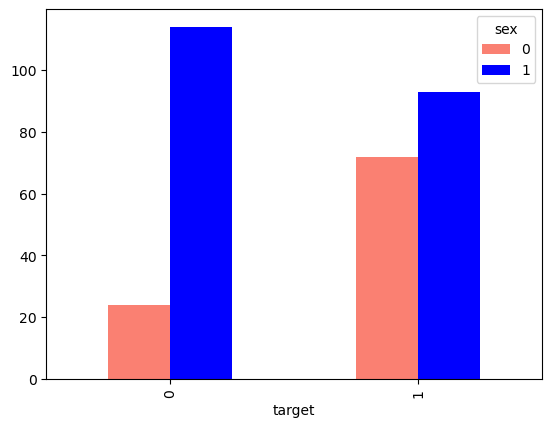

In [4]:
# Compare the target column with the sex column
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   color = ['salmon','blue'])


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Typical Angia'),
  Text(1, 0, 'Atypical Angia'),
  Text(2, 0, 'Non-Angial Pain'),
  Text(3, 0, 'Asymptomatic')])

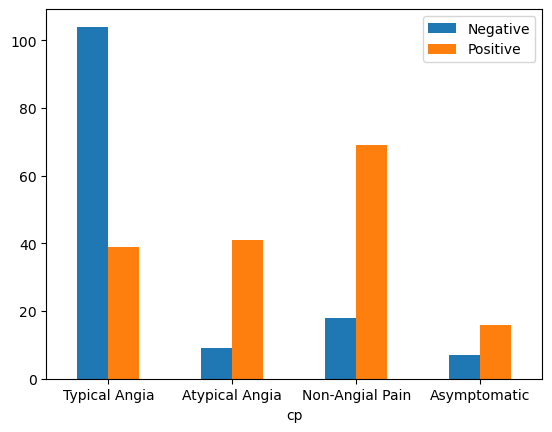

In [5]:
# Finding the data patterns in the chest pain
pd.crosstab(df.cp, df.target).plot(kind='bar')
tick_labels = ['Typical Angia','Atypical Angia','Non-Angial Pain','Asymptomatic']
ax = plt.subplot()
ax.set_xticklabels(tick_labels, fontsize=10)
plt.legend(['Negative','Positive'])
plt.xticks(rotation=0)

### Building a correlation matrix

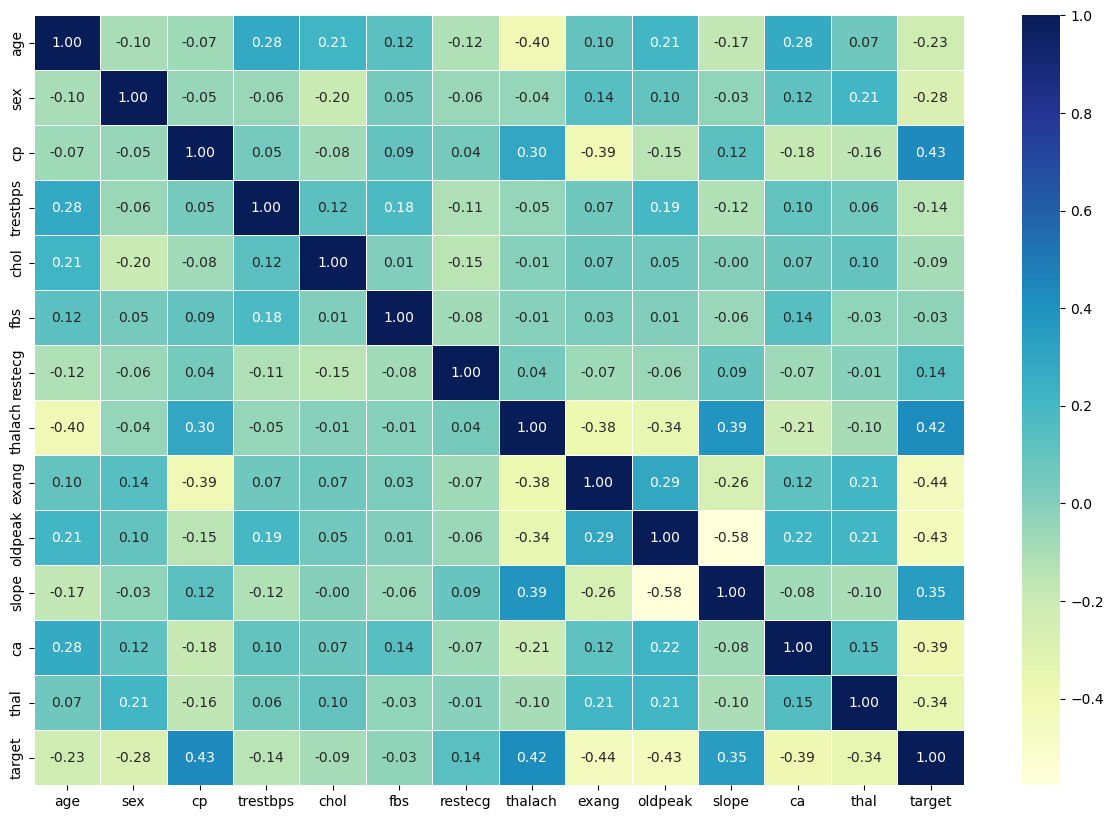

In [6]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

# Experimentation Phase

### Preparing the data for modelling

Experimenting on 3 different machine learning model
1. LogisticRegrssion
2. RandomForestClassifier
3. KNeighborsClassifier

In [8]:
#Splitting the data

X = df.drop('target',axis=1)
Y = df['target']

# forming the training and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

models = {
    "Logistic Regression":LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Radnom Forest Classifier":RandomForestClassifier()
}

def fitScore(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores


In [9]:
model_scores = fitScore(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\risha\Udemy_ML\Project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.5901639344262295,
 'Radnom Forest Classifier': 0.8032786885245902}

## Model Comparision

<Axes: >

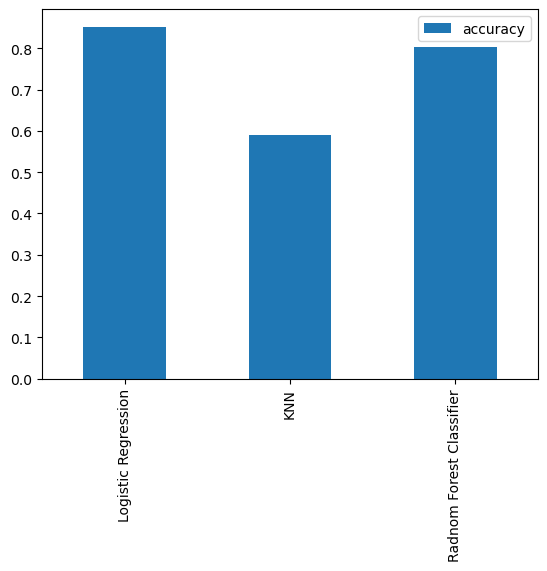

In [10]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

## Hyperparameter Tuning

In [11]:
train_scores = []
test_scores = []
# List of different n_neighbors
neighbors = range(1,21)
#Looping through the different n_neighbors
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append((knn.score(x_test,y_test),i))

## Tunintg using RandomizedSearchCV
Tuning Logistic Regression Model using the RandomizedSearchCV

In [12]:
# Creating a hyperparameter grid
log_reg_grid = {
    'C': np.logspace(-4,4,20), #Returns an array of evenly spaced numbers on a logscale
    'solver': ['liblinear']
}
rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None, 3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
}

In [13]:
#Tuning using the randomizedSearchCV

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)#Verbose defines how much information is displayed
#fitting the model
rs_log_reg.fit(x_train,y_train)

#finding out the best params
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
#Tuning the RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
#fitting the model
rs_rf.fit(x_train,y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(x_test,y_test) # Improvement can be seen from the previous score of 0.83

> **The best results were provided by the LogisticRegressionModel hence further tuning would take place on this model only**

## Hyperparameter Tuning using the GridSearchCV

In [14]:
log_reg_grid =  {
                'penalty' : ['l2'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear'],
                'max_iter' : [100]
                }
gs_logReg = GridSearchCV(LogisticRegression(),
                        param_grid= log_reg_grid,
                        cv=5,
                        n_jobs=-1,
                        verbose=True)
gs_logReg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             verbose=True)

In [15]:
gs_logReg.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [16]:
gs_logReg.score(x_test,y_test)

0.8524590163934426

## Evaluating the model on the following matrix
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precesion
* Recall
* F1-score


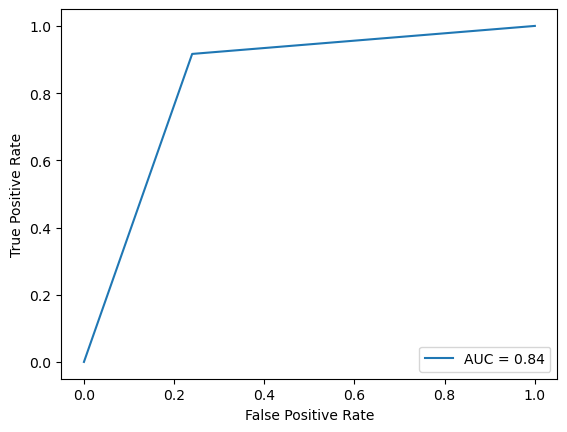

In [24]:
# Plotting the ROC curve
y_preds = gs_logReg.predict(x_test)
fpr,tpr,threshholds = roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

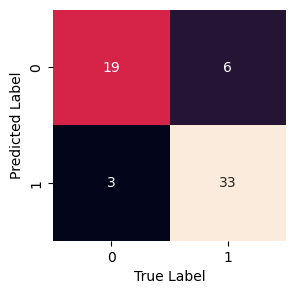

In [29]:
# Plotting the confusion matriX

def plot_conf_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar =False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_matrix(y_test,y_preds)

In [30]:
# Getting a Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



### Calculating the Evaluation matrix using cross validation
We are going to use the cross-val-score for plotting the evaluation matrix using cross validation

In [31]:
# Creating a new classifiers with the following parameters
clf = LogisticRegression(C=0.08858667904100823,
                        solver='liblinear')
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [46]:
cv_acc = np.mean(cv_acc)

In [34]:
cv_recall = cross_val_score(clf,
                           X,
                           Y,
                           cv=5,
                           scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.84848485, 0.90909091, 0.87878788])

In [35]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [37]:
cv_f1 = cross_val_score(clf,
                       X,
                       Y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964057

<Axes: title={'center': 'Cross Validated Matrix'}>

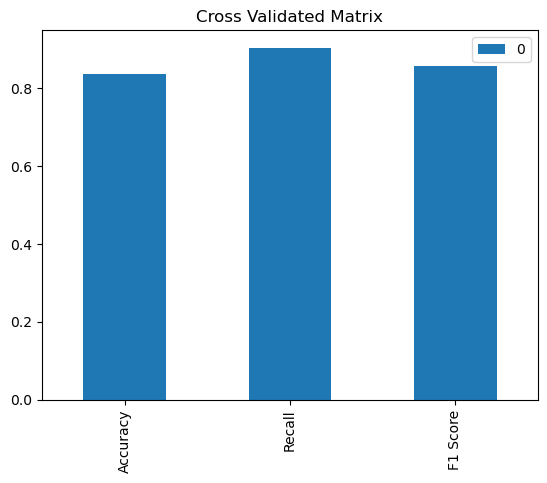

In [48]:
# Visualizing the cross validated matrix
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Recall":cv_recall,
    "F1 Score":cv_f1,  
},
index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Matrix")

In [50]:
# Saving the model
pickle.dump(clf, open("Heart_Disease_Model.pkl","wb"))